## Task Title: Predict Water Potability with Machine Learning

### **Abdul Basit**

#### Problem Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

#### Dataset Contents

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

<a id="cont"></a>

### Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Understanding the Data</a>

<a href=#four>4. Univariate Analysis</a>

<a href=#five>5. Bivariate Analysis</a>

<a href=#six>6. Missing Values</a>

<a href=#seven>7. Model Training</a>

<a href=#eight>8. Hyperparamter Tuning</a>

<a href=#nine>9. Evaluation & Selecting Best Model</a>

<a href=#ten>10. Feature Importance</a>

<a href=#eleven>11. Saving Model & Inference</a>

<a id="one"></a>
#### 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In this section, we import the necessary libraries for our analysis and modeling.

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import pickle

<a id="two"></a>
#### 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

In this section We are loading the data from the csv file into a DataFrame.

In [164]:
df = pd.read_csv('water_potability.csv')
df.head()

ph  Hardness   Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  \
0  NaN    204.89 20791.32         7.30   368.52        564.31           10.38   
1 3.72    129.42 18630.06         6.64      NaN        592.89           15.18   
2 8.10    224.24 19909.54         9.28      NaN        418.61           16.87   
3 8.32    214.37 22018.42         8.06   356.89        363.27           18.44   
4 9.09    181.10 17978.99         6.55   310.14        398.41           11.56   

   Trihalomethanes  Turbidity  Potability  
0            86.99       2.96           0  
1            56.33       4.50           0  
2            66.42       3.06           0  
3           100.34       4.63           0  
4            32.00       4.08           0

<a id="three"></a>
#### 3. Understanding The Data
<a href=#cont>Back to Table of Contents</a>

In this section, We will understand the data superficially


In [165]:
shape = df.shape
print("No. of Columns :",shape[1])
print("No. of Rows :", shape[0])

No. of Columns : 10
No. of Rows : 3276


In [73]:
df.duplicated().sum()

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [166]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [76]:
df.describe()

ph  Hardness   Solids  Chloramines  Sulfate  Conductivity  \
count 2785.00   3276.00  3276.00      3276.00  2495.00       3276.00   
mean     7.08    196.37 22014.09         7.12   333.78        426.21   
std      1.59     32.88  8768.57         1.58    41.42         80.82   
min      0.00     47.43   320.94         0.35   129.00        181.48   
25%      6.09    176.85 15666.69         6.13   307.70        365.73   
50%      7.04    196.97 20927.83         7.13   333.07        421.88   
75%      8.06    216.67 27332.76         8.11   359.95        481.79   
max     14.00    323.12 61227.20        13.13   481.03        753.34   

       Organic_carbon  Trihalomethanes  Turbidity  Potability  
count         3276.00          3114.00    3276.00     3276.00  
mean            14.28            66.40       3.97        0.39  
std              3.31            16.18       0.78        0.49  
min              2.20             0.74       1.45        0.00  
25%             12.07            55.84       3.44        0.00  
50%             14.22            66.62       3.96        0.00  
75%             16.56            77.34       4.50        1.00  
max             28.30           124.00       6.74        1.00

<a id="four"></a>
#### 4. Univariate Analysis
<a href=#cont>Back to Table of Contents</a>

In this section, We will perform Univariate Analysis.<br>
Univariate analysis explores each variable in a data set, separately


In [78]:
df.drop('Potability', axis=1).skew()

ph                 0.03
Hardness          -0.04
Solids             0.62
Chloramines       -0.01
Sulfate           -0.04
Conductivity       0.26
Organic_carbon     0.03
Trihalomethanes   -0.08
Turbidity         -0.01
dtype: float64

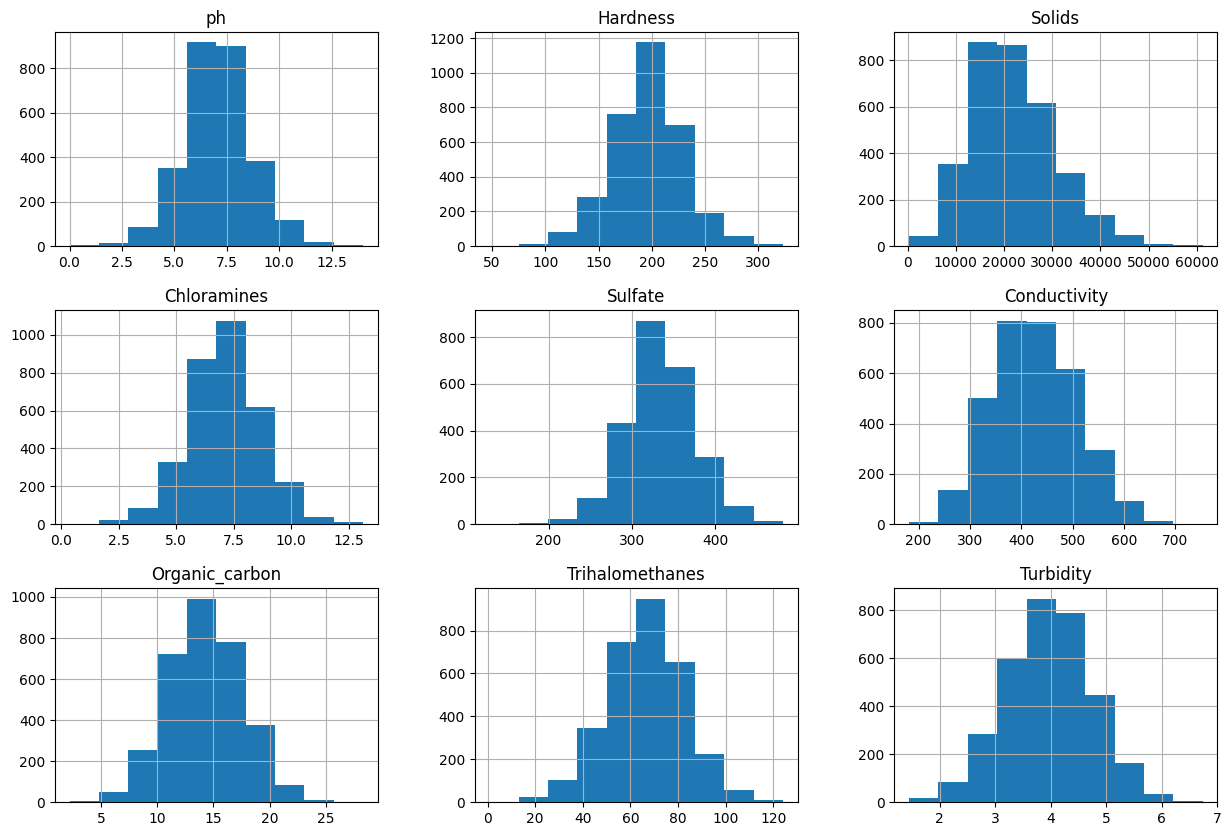

In [77]:
df.drop('Potability', axis=1).hist(figsize=(15,10));

<li>Our features have very close to normal distribution.<br>
<li>Solids have slightly right skewness.

<a id="five"></a>
#### 5. Bivariate Analysis
<a href=#cont>Back to Table of Contents</a>

In this section, We will perform Bivariate Analysis.<br>
Bivariate analysis refers to the analysis of two variables to determine relationships between them


In [79]:
df.corr()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
ph               1.00      0.08   -0.09        -0.03     0.02          0.02   
Hardness         0.08      1.00   -0.05        -0.03    -0.11         -0.02   
Solids          -0.09     -0.05    1.00        -0.07    -0.17          0.01   
Chloramines     -0.03     -0.03   -0.07         1.00     0.03         -0.02   
Sulfate          0.02     -0.11   -0.17         0.03     1.00         -0.02   
Conductivity     0.02     -0.02    0.01        -0.02    -0.02          1.00   
Organic_carbon   0.04      0.00    0.01        -0.01     0.03          0.02   
Trihalomethanes  0.00     -0.01   -0.01         0.02    -0.03          0.00   
Turbidity       -0.04     -0.01    0.02         0.00    -0.01          0.01   
Potability      -0.00     -0.01    0.03         0.02    -0.02         -0.01   

                 Organic_carbon  Trihalomethanes  Turbidity  Potability  
ph                         0.04             0.00      -0.04       -0.00  
Hardness                   0.00            -0.01      -0.01       -0.01  
Solids                     0.01            -0.01       0.02        0.03  
Chloramines               -0.01             0.02       0.00        0.02  
Sulfate                    0.03            -0.03      -0.01       -0.02  
Conductivity               0.02             0.00       0.01       -0.01  
Organic_carbon             1.00            -0.01      -0.03       -0.03  
Trihalomethanes           -0.01             1.00      -0.02        0.01  
Turbidity                 -0.03            -0.02       1.00        0.00  
Potability                -0.03             0.01       0.00        1.00

<Axes: >

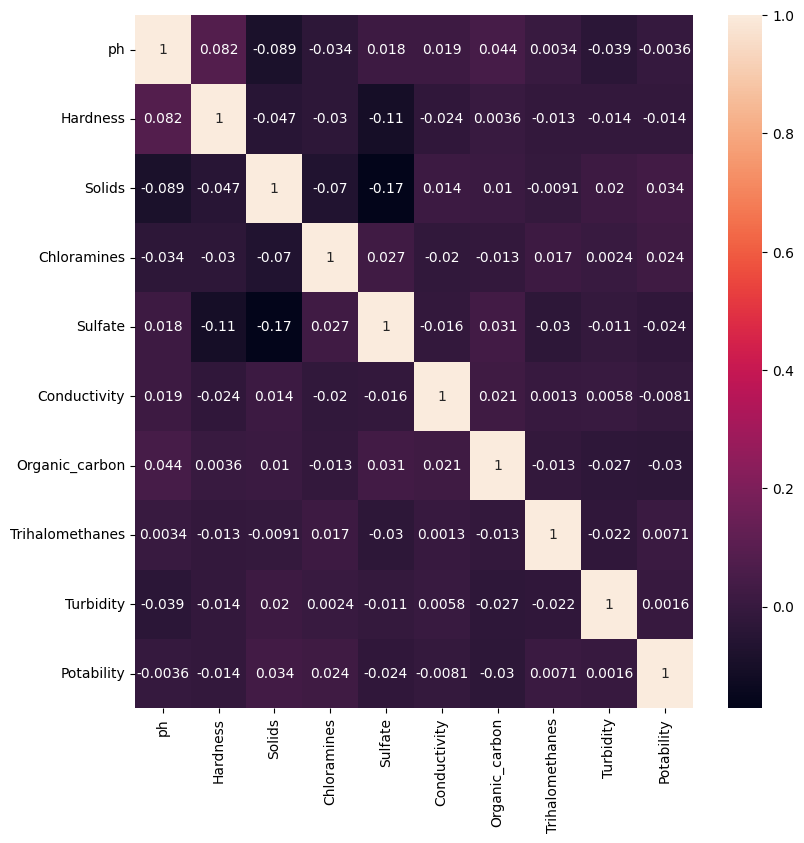

In [80]:
fig,ax=plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

<li>As seen in the correlation matrix there is no strong relationship between the variables.

<a id="six"></a>
#### 6. Missing Values
<a href=#cont>Back to Table of Contents</a>

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

<li>Mostly Machine Learning algorithms don't work with the missing values.
<li>For those algorithms, missing values needs to be removed or converted to numbers.
<li>Handling with missing values should be done before the modeling.<br>

In this notebook we will see two popular methods to deal the missing data:
<li>Removing observations with missing data
<li>Performing mean or median imputation

In [81]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [82]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]


for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4)*100,'% missing values')

ph 14.99 % missing values
Sulfate 23.84 % missing values
Trihalomethanes 4.95 % missing values


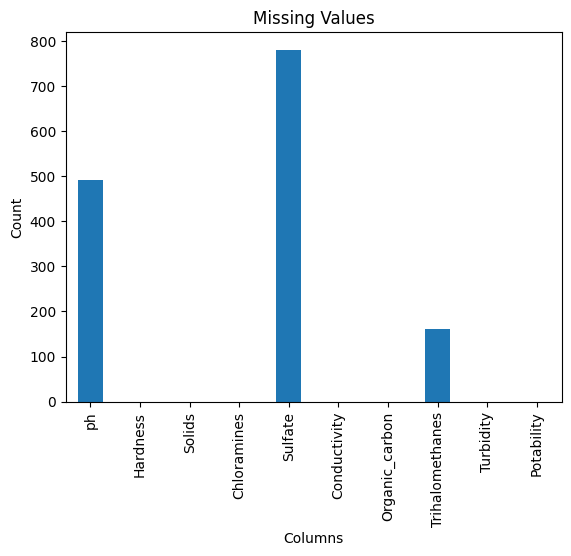

In [83]:
missing_values = df.isnull().sum()
missing_values.plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [84]:
df['Potability'].value_counts(normalize=True)

Potability
0   0.61
1   0.39
Name: proportion, dtype: float64

Ratio of Output Variable in Original Dataset

<li>61% of the instances of our target variable is 'Not Potable'
<li>39% of the instances of our target variable is 'Potable'

#### Method 1: Removing Null Rows

In [85]:
# Remove null rows 
df.dropna(inplace=True)

# Check the shape of the DataFrame after removing nulls
print("Shape of DataFrame after removing nulls:", df.shape)

Shape of DataFrame after removing nulls: (2011, 10)


In [86]:
df['Potability'].value_counts(normalize=True)

Potability
0   0.60
1   0.40
Name: proportion, dtype: float64

<li>60% of the instances of our target variable is 'Not Potable'
<li>40% of the instances of our target variable is 'Potable'<br>

Ratio of Dependent Variable is almost same after removing null values

In [90]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values 



X_trainLZ, X_testLZ, y_trainLZ, y_testLZ = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

clf = LazyClassifier()
models,predictionLZ = clf.fit(X_trainLZ, X_testLZ, y_trainLZ, y_testLZ)
models                        

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:03<00:00,  8.94it/s]

[LightGBM] [Info] Number of positive: 574, number of negative: 833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1407, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407960 -> initscore=-0.372404
[LightGBM] [Info] Start training from score -0.372404


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.70               0.65     0.65      0.68   
SVC                                0.71               0.65     0.65      0.68   
NuSVC                              0.67               0.64     0.64      0.67   
LGBMClassifier                     0.67               0.64     0.64      0.67   
QuadraticDiscriminantAnalysis      0.69               0.63     0.63      0.66   
ExtraTreesClassifier               0.69               0.63     0.63      0.66   
XGBClassifier                      0.67               0.63     0.63      0.66   
BaggingClassifier                  0.67               0.62     0.62      0.65   
KNeighborsClassifier               0.65               0.61     0.61      0.64   
DecisionTreeClassifier             0.61               0.59     0.59      0.61   
ExtraTreeClassifier                0.61               0.58     0.58      0.61   
GaussianNB                         0.63               0.56     0.56      0.58   
AdaBoostClassifier                 0.62               0.56     0.56      0.58   
LabelPropagation                   0.58               0.55     0.55      0.58   
LabelSpreading                     0.58               0.55     0.55      0.58   
PassiveAggressiveClassifier        0.56               0.53     0.53      0.55   
LinearDiscriminantAnalysis         0.62               0.51     0.51      0.48   
LogisticRegression                 0.62               0.51     0.51      0.48   
RidgeClassifier                    0.61               0.51     0.51      0.48   
RidgeClassifierCV                  0.61               0.51     0.51      0.48   
LinearSVC                          0.61               0.51     0.51      0.48   
DummyClassifier                    0.61               0.50     0.50      0.46   
CalibratedClassifierCV             0.61               0.50     0.50      0.46   
BernoulliNB                        0.61               0.50     0.50      0.46   
Perceptron                         0.54               0.50     0.50      0.53   
SGDClassifier                      0.48               0.48     0.48      0.49   
NearestCentroid                    0.48               0.48     0.48      0.48   

                               Time Taken  
Model                                      
RandomForestClassifier               1.15  
SVC                                  0.13  
NuSVC                                0.14  
LGBMClassifier                       0.06  
QuadraticDiscriminantAnalysis        0.01  
ExtraTreesClassifier                 0.37  
XGBClassifier                        0.21  
BaggingClassifier                    0.29  
KNeighborsClassifier                 0.05  
DecisionTreeClassifier               0.04  
ExtraTreeClassifier                  0.01  
GaussianNB                           0.01  
AdaBoostClassifier                   0.37  
LabelPropagation                     0.07  
LabelSpreading                       0.10  
PassiveAggressiveClassifier          0.01  
LinearDiscriminantAnalysis           0.01  
LogisticRegression                   0.01  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.02  
LinearSVC                            0.06  
DummyClassifier                      0.01  
CalibratedClassifierCV               0.03  
BernoulliNB                          0.01  
Perceptron                           0.01  
SGDClassifier                        0.01  
NearestCentroid                      0.01

#### Method 2: Performing Median Imputation

Imputation is the process of replacing missing data with substituted values

The amount of the missing value is crucial to decide the data imputation technique because, in essence, we want our imputed values should be as close as possible to their original values.

In the literature, mostly 20% missing data is suggested as a threshold to impute the data. But, in real life, we may have many other factors to consider before deciding on it.

Mean, Median imputation should be calculated by using train data

In [92]:
df2 = pd.read_csv('water_potability.csv')


X2 = df2.drop('Potability', axis=1)
y2 = df2['Potability']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3,random_state=0)

In [93]:
X_train.head()

ph  Hardness   Solids  Chloramines  Sulfate  Conductivity  \
906   NaN    216.00 35971.03        10.03   330.86        558.11   
2998 9.13    200.03 28273.60         7.50      NaN        453.87   
1818 7.28    194.88 18270.11         6.12   344.88        402.66   
1042 5.50    230.31 13902.97         9.62   352.08        442.17   
838   NaN    214.74 12666.01         7.09   302.49        319.42   

      Organic_carbon  Trihalomethanes  Turbidity  
906            14.34            81.77       2.93  
2998           12.86            64.18       3.03  
1818           15.46            76.99       4.93  
1042           14.74              NaN       5.85  
838            15.43            92.69       5.01

In [96]:
X_train.isnull().sum()

ph                 343
Hardness             0
Solids               0
Chloramines          0
Sulfate            540
Conductivity         0
Organic_carbon       0
Trihalomethanes    117
Turbidity            0
dtype: int64

In [97]:
X_train['ph'].fillna(value=X_train['ph'].median(),inplace=True)
X_train['Sulfate'].fillna(value=X_train['Sulfate'].median(),inplace=True)
X_train['Trihalomethanes'].fillna(value=X_train['Trihalomethanes'].median(),inplace=True)

In [100]:
X_test['ph'].fillna(value=X_train['ph'].median(),inplace=True)
X_test['Sulfate'].fillna(value=X_train['Sulfate'].median(),inplace=True)
X_test['Trihalomethanes'].fillna(value=X_train['Trihalomethanes'].median(),inplace=True)

In [101]:
clf = LazyClassifier()
models,predictionLZ = clf.fit(X_train, X_test, y_train, y_test)
models                        

100%|██████████| 29/29 [00:05<00:00,  5.45it/s]

[LightGBM] [Info] Number of positive: 905, number of negative: 1388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2293, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394679 -> initscore=-0.427684
[LightGBM] [Info] Start training from score -0.427684


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.67               0.62     0.62      0.66   
NuSVC                              0.67               0.62     0.62      0.66   
BaggingClassifier                  0.68               0.62     0.62      0.65   
LGBMClassifier                     0.66               0.61     0.61      0.65   
ExtraTreesClassifier               0.68               0.61     0.61      0.64   
RandomForestClassifier             0.67               0.61     0.61      0.64   
SVC                                0.68               0.60     0.60      0.64   
QuadraticDiscriminantAnalysis      0.66               0.60     0.60      0.63   
KNeighborsClassifier               0.63               0.59     0.59      0.62   
ExtraTreeClassifier                0.59               0.57     0.57      0.59   
LabelSpreading                     0.60               0.57     0.57      0.60   
LabelPropagation                   0.60               0.57     0.57      0.60   
DecisionTreeClassifier             0.58               0.55     0.55      0.58   
AdaBoostClassifier                 0.63               0.54     0.54      0.57   
GaussianNB                         0.61               0.54     0.54      0.57   
SGDClassifier                      0.59               0.52     0.52      0.56   
PassiveAggressiveClassifier        0.54               0.51     0.51      0.54   
NearestCentroid                    0.50               0.50     0.50      0.51   
LogisticRegression                 0.62               0.50     0.50      0.48   
LinearDiscriminantAnalysis         0.62               0.50     0.50      0.48   
RidgeClassifier                    0.62               0.50     0.50      0.48   
RidgeClassifierCV                  0.62               0.50     0.50      0.48   
LinearSVC                          0.62               0.50     0.50      0.48   
DummyClassifier                    0.62               0.50     0.50      0.48   
CalibratedClassifierCV             0.62               0.50     0.50      0.48   
BernoulliNB                        0.62               0.50     0.50      0.48   
Perceptron                         0.50               0.50     0.50      0.50   

                               Time Taken  
Model                                      
XGBClassifier                        0.11  
NuSVC                                0.37  
BaggingClassifier                    0.56  
LGBMClassifier                       0.07  
ExtraTreesClassifier                 0.47  
RandomForestClassifier               2.10  
SVC                                  0.28  
QuadraticDiscriminantAnalysis        0.01  
KNeighborsClassifier                 0.07  
ExtraTreeClassifier                  0.02  
LabelSpreading                       0.26  
LabelPropagation                     0.17  
DecisionTreeClassifier               0.07  
AdaBoostClassifier                   0.45  
GaussianNB                           0.01  
SGDClassifier                        0.02  
PassiveAggressiveClassifier          0.01  
NearestCentroid                      0.02  
LogisticRegression                   0.02  
LinearDiscriminantAnalysis           0.01  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.01  
LinearSVC                            0.09  
DummyClassifier                      0.01  
CalibratedClassifierCV               0.04  
BernoulliNB                          0.02  
Perceptron                           0.02

We can see that overall, the Accuracy of most of the models decreased or remained similar after imputation. This may be because the percentage of missing values is not very high. For the purpose of this project,<br><br>
 **I have chosen to go with Method 1: Removing Null Rows**

<a id="seven"></a>
#### 7. Model Training 
<a href=#cont>Back to Table of Contents</a>

This section of the code focuses on training and selecting the best-performing machine learning model on given dataset. It involves the preparation of data, model initialization, training, and evaluation to identify the optimal model

In [122]:
X = df.drop("Potability", axis = 1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (1407, 9)
X_test (604, 9)
y_train (1407,)
y_test (604,)


Choosing 5 Popular Models for Classification keeping in mind the LazyPredict Results also.

In [123]:
model_pipeline = []
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(ExtraTreesClassifier())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(XGBClassifier())

for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model,'->', metrics.accuracy_score(y_test,y_pred))


RandomForestClassifier() -> 0.6920529801324503
SVC() -> 0.6076158940397351
ExtraTreesClassifier() -> 0.7003311258278145
KNeighborsClassifier() -> 0.5447019867549668
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) -> 0.6655629139072847


Choosing Top 3 Models for Hyperparameter Tuning

I also added **CatBoostClassifier** based on my previous experience of working with it and acheiving high accuracy 

<a id="eight"></a>
#### 8. Hyperparameter Tuning 
<a href=#cont>Back to Table of Contents</a>

The machine learning model is evaluated for a range of hyperparameter values.

We will use RandomizedSearchCV which performs a randomized search over a specified hyperparameter space. It fits the model with different combinations of hyperparameters and uses cross-validation to evaluate each combination.This approach reduces unnecessary computation.

RepeatedStratifiedKFold is used to define a cross-validation strategy. It performs stratified K-fold cross-validation with repeated iterations. In this case, a 5-fold cross-validation that is repeated 2 times (n_splits=5 and n_repeats=2). This means the dataset will be split into 5 subsets, and this process will be repeated 2 times to ensure robustness.

In [129]:
model_params = {
    'Extra Trees':
    {
        'model':ExtraTreesClassifier(),
        'params':
        {
            'n_estimators':[600,1000,2000],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    },
    'XGB':
    {
        'model':XGBClassifier(),
        'params':
        {
            'learning_rate':[0.001,0.01,0.1],
            'n_estimators':[600,1000,2000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[600,1000,2000],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    },
    'Cat Boost':
    {
        'model':CatBoostClassifier(),
        'params':
        {
            'iterations':[600,1000,2000],
            'learning_rate':[0.001,0.01,0.1],
            'max_depth':list(range(1,11))
        }
    },

}

In [130]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv)
    rs.fit(X_train,y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
scores

0:	learn: 0.6931086	total: 5.31ms	remaining: 5.31s
1:	learn: 0.6930301	total: 6.88ms	remaining: 3.44s
2:	learn: 0.6929809	total: 8.14ms	remaining: 2.7s
3:	learn: 0.6929038	total: 9.36ms	remaining: 2.33s
4:	learn: 0.6928645	total: 10.5ms	remaining: 2.08s
5:	learn: 0.6928133	total: 11.7ms	remaining: 1.94s
6:	learn: 0.6927534	total: 12.9ms	remaining: 1.82s
7:	learn: 0.6927130	total: 14.2ms	remaining: 1.76s
8:	learn: 0.6926771	total: 15.4ms	remaining: 1.7s
9:	learn: 0.6926159	total: 16.8ms	remaining: 1.67s
10:	learn: 0.6925703	total: 18.4ms	remaining: 1.65s
11:	learn: 0.6925316	total: 19.8ms	remaining: 1.63s
12:	learn: 0.6924758	total: 21.3ms	remaining: 1.61s
13:	learn: 0.6924393	total: 22.6ms	remaining: 1.59s
14:	learn: 0.6924014	total: 23.8ms	remaining: 1.56s
15:	learn: 0.6923454	total: 25.1ms	remaining: 1.54s
16:	learn: 0.6923018	total: 26.3ms	remaining: 1.52s
17:	learn: 0.6922540	total: 27.7ms	remaining: 1.51s
18:	learn: 0.6922010	total: 29ms	remaining: 1.5s
19:	learn: 0.6921541	total:

[['Extra Trees',
  {'n_estimators': 1000, 'max_features': 'log2', 'max_depth': 9},
  0.6428535372655916],
 ['XGB',
  {'n_estimators': 1000,
   'max_features': 'log2',
   'max_depth': 10,
   'learning_rate': 0.01},
  0.6446076575553368],
 ['Random Forest',
  {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 8},
  0.6531561545644986],
 ['Cat Boost',
  {'max_depth': 10, 'learning_rate': 0.001, 'iterations': 2000},
  0.6712753337876378]]

In [131]:
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

Model                                         Parameters  Score
0    Extra Trees  {'n_estimators': 1000, 'max_features': 'log2',...   0.64
1            XGB  {'n_estimators': 1000, 'max_features': 'log2',...   0.64
2  Random Forest  {'n_estimators': 600, 'max_features': 'sqrt', ...   0.65
3      Cat Boost  {'max_depth': 10, 'learning_rate': 0.001, 'ite...   0.67

<a id="nine"></a>
#### 9. Evaluation & Selection of Best Model 
<a href=#cont>Back to Table of Contents</a>

Evaluating the models on Test Set using the hypertuned parameters

In [133]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

model_pipeline = []
model_pipeline.append(RandomForestClassifier(n_estimators = 600, max_features = 'sqrt', max_depth = 8))
model_pipeline.append(ExtraTreesClassifier(n_estimators = 1000, max_features = 'log2', max_depth = 9))
model_pipeline.append(XGBClassifier(n_estimators = 1000, max_features = 'log2', max_depth = 10, learning_rate = 0.01))
model_pipeline.append(CatBoostClassifier(max_depth = 10, learning_rate = 0.001, iterations = 2000))




for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model,'->', metrics.accuracy_score(y_test,y_pred))


RandomForestClassifier(max_depth=8, n_estimators=600) -> 0.6986754966887417
ExtraTreesClassifier(max_depth=9, max_features='log2', n_estimators=1000) -> 0.6622516556291391
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features='log2',
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...) -> 0.6870860927152318
0:	learn: 0.6928207	total: 30ms	remaining: 60s
1

<li>RandomForestClassifier -> 0.6986754966887417
<li>ExtraTreesClassifier -> 0.66225165562913914
<li>XGBClassifier -> 0.6870860927152318
<li>CatBoostClassifier -> 0.6937086092715232

RandomForest & CatBoost both were very close with RandomForest having a slightly higher accuracy on the test data set

### Best Model: Random Forest<br>
Best Parameters:
<li>Iterations: 600
<li>Max Depth: 8

Accuracy Score: 0.6986754966887417


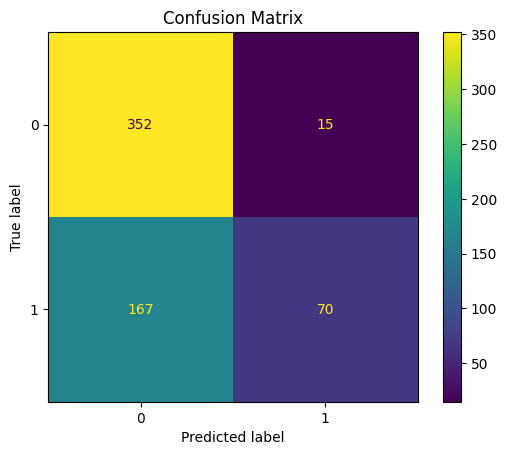

In [143]:
model_final = RandomForestClassifier(n_estimators = 600, max_depth = 8)
model_final.fit(X_train,y_train)
y_pred_final = model_final.predict(X_test)
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred_final))
cm = confusion_matrix(y_test, y_pred_final)

disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

The Confusion Matrix tells us that the number of False Negatives is high. This may be due to the fact that the ratio of positive and negative records was not equal and there was a 60-40 ratio with less positive records.

<a id="ten"></a>
#### 10. Feature Influence on Water Quality
<a href=#cont>Back to Table of Contents</a>

The RandomForestClassifier provides feature importances, which indicate the relative importance of each input feature in making predictions. The higher the feature importance value, the more influential that feature is in the model's predictions. By examining the feature importances, we can gain insights into which features have the strongest impact on the target variable. This information can be valuable in understanding the underlying relationships in the data and identifying key factors that drive the predictions.

Feature ph -> Score: 16.23883
Feature Hardness -> Score: 10.30419
Feature Solids -> Score: 11.48129
Feature Chloramines -> Score: 11.58890
Feature Sulfate -> Score: 17.15942
Feature Conductivity -> Score: 8.22861
Feature Organic_carbon -> Score: 8.08864
Feature Trihalomethanes -> Score: 8.94349
Feature Turbidity -> Score: 7.96663


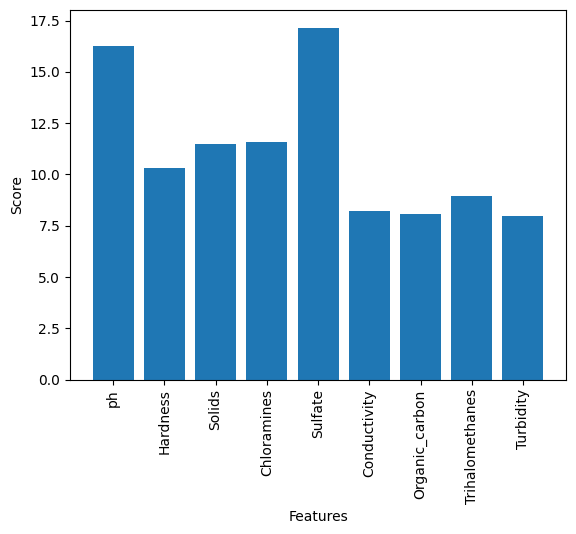

In [161]:
importance = model.feature_importances_
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i, v in enumerate(importance):
    print('Feature %s -> Score: %.5f' % (features[i], v))

plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

Sulfate followed by pH seems to have the highest effect on output

<a id="eleven"></a>
#### 11. Saving Model & Inference
<a href=#cont>Back to Table of Contents</a>

In [144]:
filename = "task_model.pickle"

pickle.dump(model_final, open(filename, "wb"))

In [145]:
loaded_model = pickle.load(open(filename, "rb"))

In [150]:
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

reshaped_array = array.reshape(1, -1)

result = loaded_model.predict(reshaped_array)
result[0]

1